<a href="https://colab.research.google.com/github/evgeniytr1509/HW_DS_6/blob/main/HW_DS_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Задание 1

import pandas as pd
from matplotlib import pyplot as plt

# Ссылка на файл CSV в Google Drive
csv_data = 'https://drive.google.com/uc?id=1868DgS5UgDy2od0Q3ZNhJ4UG3o49S5p8'
csv_mnist = 'https://drive.google.com/uc?id=184-OMtzy91lxIL-VRow5GMCAtudSlkSx'

# Чтение данных из файла CSV и сохранение их в Pandas DataFrame
df_data = pd.read_csv(csv_data)
df_mnist = pd.read_csv(csv_mnist)
# Вывод всего фрейма данных
df_data
df_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


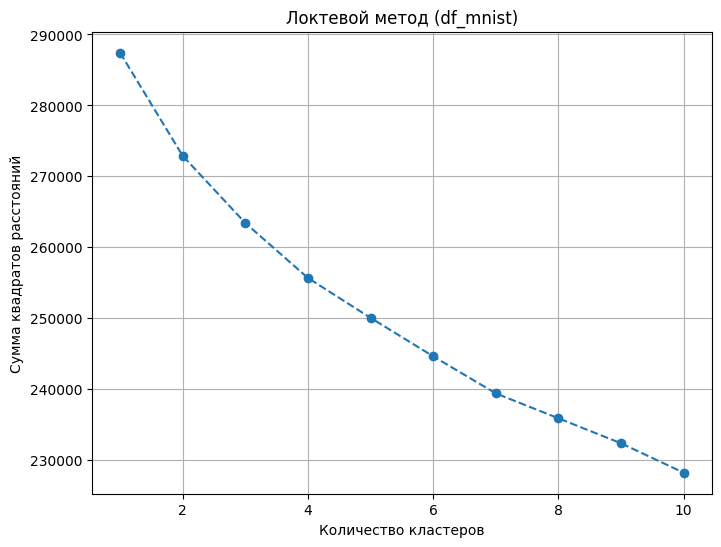

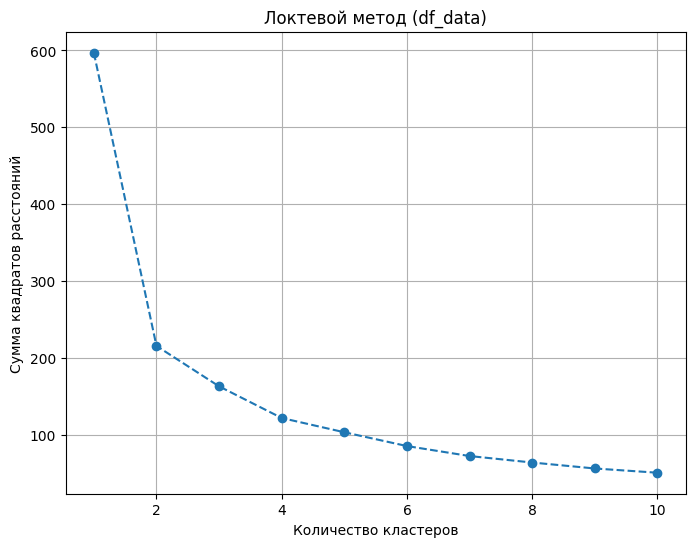

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Функция для определения оптимального количества кластеров с использованием локтевого метода
def find_optimal_clusters(data):
    inertia = []
    for k in range(1, 11):  # Пробуем количество кластеров от 1 до 10
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia


# Функция для визуализации локтевого метода
def plot_elbow(inertia, title):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Сумма квадратов расстояний')
    plt.grid()
    plt.title(title)
    plt.show()

# Применение алгоритма K-means и локтевого метода к данным df_mnist
data_mnist = df_mnist.iloc[:1000]  # Выбираем подмножество
data_mnist_scaled = StandardScaler().fit_transform(data_mnist)
inertia_mnist = find_optimal_clusters(data_mnist_scaled)
plot_elbow(inertia_mnist, 'Локтевой метод (df_mnist)')

# Применение алгоритма K-means и локтевого метода к данным df_data
data_data = df_data.iloc[:1000]  # Выбираем подмножество данных
data_data_scaled = StandardScaler().fit_transform(data_data)
inertia_data = find_optimal_clusters(data_data_scaled)
plot_elbow(inertia_data, 'Локтевой метод (df_data)')

# Выбор оптимального количества кластеров.
# Так как сумма квадратов расстояний между точками на графике локтевого метода значительно уменьшается при количестве кластеров от 2 до 3,
# оптимальное количество кластеров принято 3.

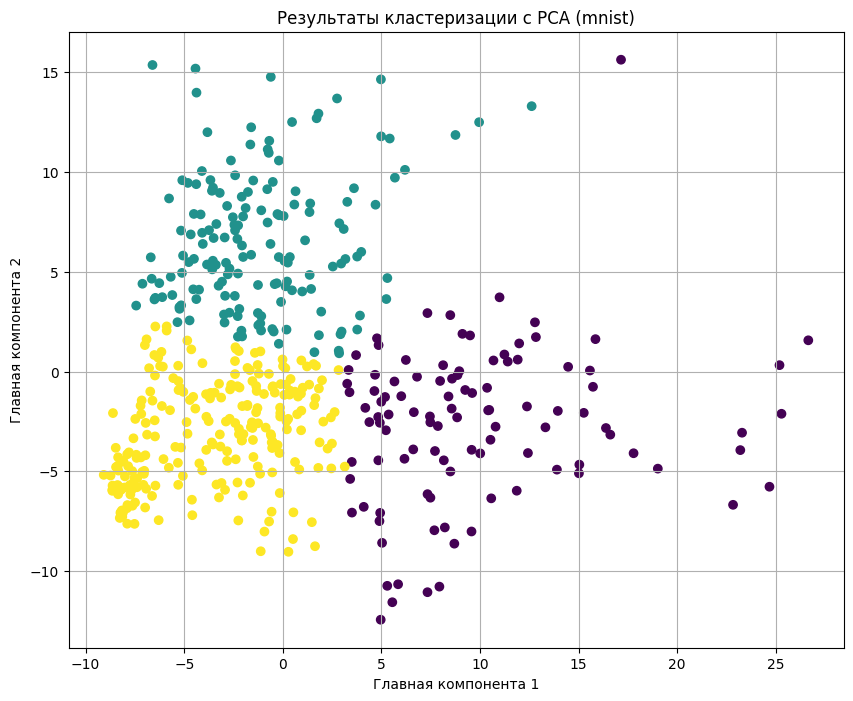

In [32]:
# Задание 2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# подмножество данных
data_mnist = df_mnist.iloc[:1000]

# стандартизацию данных
scaler = StandardScaler()
data_mnist_scaled = scaler.fit_transform(data_mnist)

# PCA для уменьшения размерности до 2-мерного варианта
pca = PCA(n_components=2)
data_mnist_pca = pca.fit_transform(data_mnist_scaled)

# K-means с оптимальным количеством кластеров (выбранным ранее)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
kmeans.fit(data_mnist_pca)
cluster_labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 8))
plt.scatter(data_mnist_pca[:, 0], data_mnist_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Результаты кластеризации с PCA (mnist)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid()
plt.show()


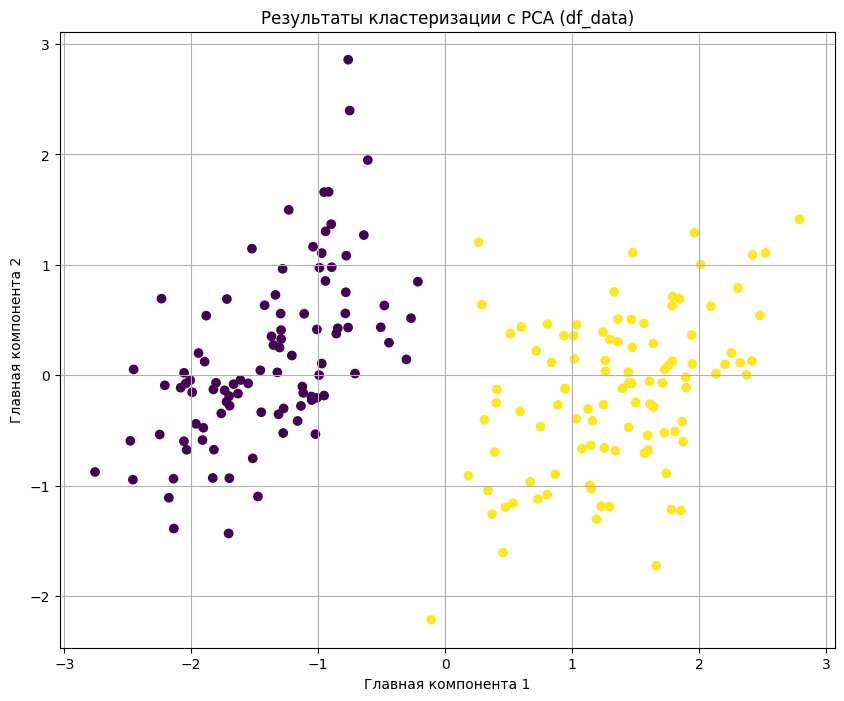

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Подмножество данных
df_data = df_data.iloc[:1000]

# Стандартизация данных
scaler = StandardScaler()
df_data_scaled = scaler.fit_transform(df_data)

# PCA для уменьшения размерности до 2-мерного варианта
pca = PCA(n_components=2)
df_data_pca = pca.fit_transform(df_data_scaled)

# K-means с оптимальным количеством кластеров (выбранным ранее)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
kmeans.fit(df_data_pca)
cluster_labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 8))
plt.scatter(df_data_pca[:, 0], df_data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Результаты кластеризации с PCA (df_data)')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.grid()
plt.show()